# 👋🌍 Hello, world: Submit a Qiskit job to IonQ

In this notebook, we'll review the basics of Azure Quantum by submitting a simple *job*, or quantum program, to [IonQ](https://ionq.com/). We will use [Qiskit](https://qiskit.org/) to express the quantum job.

## Submit a simple job to IonQ using Azure Quantum
Azure Quantum provides several ways to express quantum programs. In this example we are using Qiskit, but note that Q# and Cirq are also supported. All code in this example will be written in Python.

Let's begin. When you see a code block, hover over it and click the triangle play-button to execute it. To avoid any compilation issues, this should be done in order from top to bottom.

### 1. Connect to the "Azure Quantum workspace"

To connect to the Azure Quantum service, construct an instance of the `AzureQuantumProvider`. Note that it's imported from `azure.quantum.qiskit`.

Because we don't have access to the azure workspace on our local machine, we'll fake it using `AerProvider`.

In [4]:
# from azure.quantum.qiskit import AzureQuantumProvider
# provider = AzureQuantumProvider (
#     resource_id = "/subscriptions/e3f1c7eb-35db-4138-9a6d-6cc8455e4e3c/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/nqn-winter-hackathon-2023",
#     location = "westus"
# )
from qiskit.providers.aer import AerProvider as AzureQuantumProvider

# from qiskit_ionq.ionq_provider import IonQProvider as AzureQuantumProvider
provider = AzureQuantumProvider()

ModuleNotFoundError: No module named 'qiskit_ionq'

Let's see what providers and targets are enabled in this workspace with the following command:


In [9]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

print("This workspace's targets:")
for backend in provider.backends():
    print("- " + backend.name())

This workspace's targets:
- aer_simulator
- aer_simulator_statevector
- aer_simulator_density_matrix
- aer_simulator_stabilizer
- aer_simulator_matrix_product_state
- aer_simulator_extended_stabilizer
- aer_simulator_unitary
- aer_simulator_superop
- qasm_simulator
- statevector_simulator
- unitary_simulator
- pulse_simulator


### ❕ Do you see `ionq.simulator` in your list of targets? If so, you're ready to keep going.

Don't see it? You may need to add IonQ to your workspace to run this sample. Navigate to the **Providers** page in the portal and click **+Add** to add the IonQ provider. Don't worry, there's a free credits plan available.

## IonQ: The quantum provider
Azure Quantum partners with third-party companies to deliver solutions to quantum jobs. These company offerings are called *providers*. Each provider can offer multiple *targets* with different capabilities. See the table below for IonQ's targets.

| Target name | Target ID | Number of qubits | Description |
| --- | --- | --- | --- |
| Quantum simulator | `ionq.simulator` | 29 qubits | IonQ's cloud-based idealized simulator. Free of cost. |
| Aria 1 | `ionq.qpu.aria-1` | 23 qubits | IonQ's Aria 1 trapped-ion quantum computer. This is real quantum hardware, not a simulation. |
| Quantum computer | `ionq.qpu` | 11 qubits | IonQ's trapped-ion quantum computer. This is real quantum hardware, not a simulation. |

For this example, we will use `ionq.simulator`. To learn more about IonQ's targets, check out our [documentation](https://docs.microsoft.com/azure/quantum/provider-ionq).

### 2. Build the quantum program

Let's create a simple Qiskit circuit to run.

In [10]:
# Create a quantum circuit acting on a single qubit
circuit = QuantumCircuit(1, 1)
circuit.name = "Single qubit random"
circuit.h(0)
circuit.measure(0, 0)

# Print out the circuit
circuit.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

The circuit you built is a simple quantum random bit generator. With IonQ's idealized simulator, we will be able to calculate the probability of measuring a `1` or `0`.

### 3. Submit the quantum program to IonQ

In [14]:
# Create an object that represents IonQ's simulator target, "ionq.simulator".
#   Note that any target you have enabled in this workspace can
#   be used here. Azure Quantum makes it extremely easy to submit
#   the same quantum program to different providers.
# Because we don't have the IonQ target on our local machine, use the aer_simulator
# ionq_simulator_backend = provider.get_backend("ionq.simulator")
ionq_simulator_backend = provider.get_backend("aer_simulator")

# Using the IonQ simulator target, call "run" to submit the job. We'll
# use 100 shots (simulated runs).
job = ionq_simulator_backend.run(circuit, shots=100)
# print("Job id:", job.id())  # The Aer simulator doesn't have job ids

The job ID can be used to retrieve the results later using the [get_details function](https://docs.microsoft.com/azure/quantum/optimization-job-reference#jobdetails) or by viewing it under the **Job management** section of the portal.

### 4. Obtain the job results
You can monitor the job status with Qiskit's `job_monitor` function.

This may take a minute or so ⏳. Your job will be packaged and sent to IonQ, where it will wait its turn to be run. You'll see your job go through these stages: "job is queued" -> "job is actively running" -> "job has successfully run."

Job Status: job has successfully run


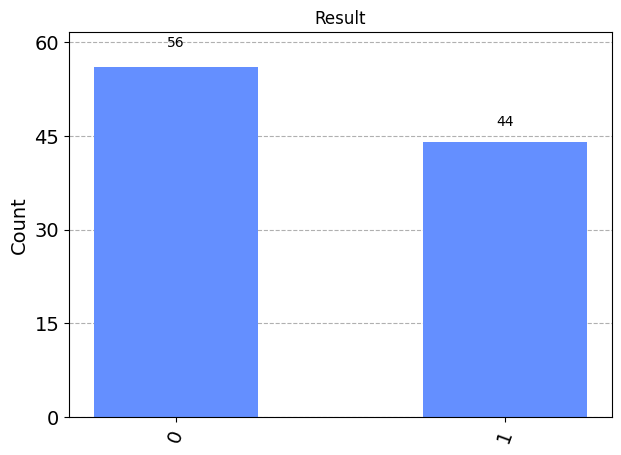

In [15]:
job_monitor(job)

result = job.result()

# The result object is native to the Qiskit package, so we can use Qiskit's tools to print the result as a histogram.
plot_histogram(result.get_counts(circuit), title="Result")

**See the histogram above? Congratulations, you've submitted a job with Azure Quantum! 👏**


### 5. Estimate costs

To estimate the costs of running this program on a simulator or hardware, you can use the `backend.estimate_cost` method.

In [17]:
backend = provider.get_backend("ionq.qpu")
cost = backend.estimate_cost(circuit, shots=100)
print(f"Estimated cost: {cost.estimated_total} {cost.currency_code}")

QiskitBackendNotFoundError: 'No backend matches the criteria'

### 6. Next steps
Next, you can try running a program on IonQ's hardware target. Just replace `ionq.simulator` with `ionq.qpu`. Or try another sample by navigating back to the sample gallery. The same "hello world" sample can be run with different quantum providers by choosing another option in the gallery card drop-down menu. Don't worry - your work here is automatically saved.

To learn more about submitting Qiskit circuits to Azure Quantum, review [this documentation](https://docs.microsoft.com/azure/quantum/quickstart-microsoft-qiskit?pivots=platform-ionq).

To learn more about job pricing, review the [Azure Quantum documentation on job costs](https://docs.microsoft.com/azure/quantum/azure-quantum-job-costs).